<div>
<img src="https://discuss.pytorch.org/uploads/default/original/2X/3/35226d9fbc661ced1c5d17e374638389178c3176.png" width="400" style="margin: 50px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
# < [Autograd](2-Autograd.ipynb) | Optimization | [Modules](4-Modules.ipynb) >

### Optimization

In this short notebook, we will see how to use the gradient obtained with Autograd to perform optimization of an objective function.  
Then we will also present some off-the-shelf Pytorch optimizers and learning rate schedulers.  
As an eye candy, we will finish with some live optimization vizualisations.

### Table of Contents

#### 1. [Optimization](#Optimization)  
#### 2. [Live Plots](#Live-Plots)

___

In [0]:
import sys
import torch


if 'google.colab' in sys.modules: # Execute if you're using Google Colab
    !wget -q https://raw.githubusercontent.com/theevann/amld-pytorch-workshop/master/live_plot.py -O live_plot.py
    !pip install -q ipympl

%matplotlib ipympl
torch.set_printoptions(precision=3)

---

# Optimization

## Optimizing "by hand"

We will start with a simple example : minimizing the square function.


In [0]:
def f(x):
    return x ** 2

We will minimize the function $f$ "by hand" using the gradient descent algorithm.

As a reminder, the update step of the algorithm is:
$$x_{t+1} = x_{t} - \lambda \nabla_x f (x_t)$$

Note:
- The gradient information $\nabla_x f (x)$ will be stored in `x.grad` once we run the `backward` function.
- The gradient is accumulated by default, so we need to clear `x.grad` after each iteration.
- We need to use `with torch.no_grad():` context for the update step since we want to change `x` in place but don't want autograd to track this change.

#### **Your turn !**

In [9]:
x0 = 8
lr = 0.01
iterations = 10

x = torch.Tensor([x0]).requires_grad_()
y = f(x)

for i in range(iterations):
    
    # < YOUR CODE HERE >

    y=f(x)

    y.backward() # compute gradient
    with torch.no_grad():
      x -=  lr*x.grad # update: change x in place 
      
    x.grad=None # clear gradient

    print(y.data)

tensor([64.])
tensor([61.466])
tensor([59.032])
tensor([56.694])
tensor([54.449])
tensor([52.293])
tensor([50.222])
tensor([48.233])
tensor([46.323])
tensor([44.489])


#### Why do we use `with torch.no_grad()` ?

Because `x` "requires grad", any operation we apply to `x` is recorded for automatic differentiation. As we don't want to track the update step of the parameters, we need to "tell" autograd not to track this change. This is done by using `torch.no_grad()`.

## Optimizing with an optimizer

### Different optimizers
PyTorch provides most common optimization algorithms encapsulated into "optimizer classes".  
An optimizer is an object that automatically loops through all the numerous parameters of your model and performs the (potentially complex) update step for you.

You first need to import `torch.optim`. 

In [0]:
import torch.optim as optim

Below are the most commonly used optimizers. Each of them has its specific parameters that you can check on the [Pytorch Doc](https://pytorch.org/docs/master/optim.html#algorithms).

In [0]:
parameters = [x]  # This should be the list of model parameters

optimizer = optim.SGD(parameters, lr=0.01, momentum=0.9)
optimizer = optim.Adam(parameters, lr=0.01)
optimizer = optim.Adadelta(parameters, lr=0.01)
optimizer = optim.Adagrad(parameters, lr=0.01)
optimizer = optim.RMSprop(parameters, lr=0.01)
optimizer = optim.LBFGS(parameters, lr=0.01)

# and there is more ...

### Using an optimizer

Now, let's use an optimizer to do the optimization !

You will need 2 new functions:
- `optimizer.zero_grad()` : This function sets the gradient of the parameters (`x` here) to 0 (otherwise it will get accumulated)
- `optimizer.step()` :  This function applies an update step

#### **Your turn !**

In [14]:
x0 = 8
lr = 0.1
iterations = 10

x = torch.Tensor([x0]).requires_grad_()
y = f(x)

# Define your optimizer
optimizer = optim.Adam([x], lr=lr)

for i in range(iterations):
    
    y = f(x)
    y.backward() # compute gradient
    optimizer.step() # does everything - knows the function x
    optimizer.zero_grad()

    print(y.data)

tensor([64.])
tensor([62.410])
tensor([60.841])
tensor([59.292])
tensor([57.765])
tensor([56.259])
tensor([54.775])
tensor([53.313])
tensor([51.873])
tensor([50.457])


### Using a learning rate scheduler

In addition to an optimizer, a learning rate scheduler can be used to adjust the learning rate during training by reducing it according to a pre-defined schedule.  
Below are some of the schedulers available in PyTorch.

In [0]:
optim.lr_scheduler.LambdaLR
optim.lr_scheduler.ExponentialLR
optim.lr_scheduler.MultiStepLR
optim.lr_scheduler.StepLR

# and some more ...

Let's try `optim.lr_scheduler.ExponentialLR`:

In [0]:
def f(x):
    return x.abs() * 5

In [16]:
x0 = 8
lr = 0.5
iterations = 150

x = torch.Tensor([x0]).requires_grad_()
optimizer = optim.SGD([x], lr=lr)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.8)

for i in range(iterations):
    optimizer.zero_grad()
    y = f(x)
    y.backward()
    optimizer.step()
    scheduler.step()
    print(y.data, " | lr : ", optimizer.param_groups[0]['lr'])

tensor([40.])  | lr :  0.4
tensor([27.500])  | lr :  0.32000000000000006
tensor([17.500])  | lr :  0.25600000000000006
tensor([9.500])  | lr :  0.20480000000000004
tensor([3.100])  | lr :  0.16384000000000004
tensor([2.020])  | lr :  0.13107200000000005
tensor([2.076])  | lr :  0.10485760000000004
tensor([1.201])  | lr :  0.08388608000000004
tensor([1.421])  | lr :  0.06710886400000003
tensor([0.677])  | lr :  0.05368709120000003
tensor([1.001])  | lr :  0.042949672960000025
tensor([0.341])  | lr :  0.03435973836800002
tensor([0.733])  | lr :  0.027487790694400018
tensor([0.126])  | lr :  0.021990232555520017
tensor([0.561])  | lr :  0.017592186044416015
tensor([0.011])  | lr :  0.014073748835532812
tensor([0.429])  | lr :  0.011258999068426251
tensor([0.077])  | lr :  0.009007199254741001
tensor([0.205])  | lr :  0.007205759403792801
tensor([0.020])  | lr :  0.0057646075230342415
tensor([0.160])  | lr :  0.0046116860184273935
tensor([0.016])  | lr :  0.003689348814741915
tensor([0.100

---

# Live Plots 

Below are some live plots to see what actually happens when you optimize a function.  
You can play with learning rates, optimizers and also define new functions to optimize !

_Note: These are not stricly speaking live plots as it is not possible to do so in colab. We actually create a video of the optimization process instead_

## 2D Plot - Optimization process

In [0]:
from live_plot import anim_2d

In [0]:
def function_2d(x):
    return x ** 2 / 20 + x.sin().tanh()

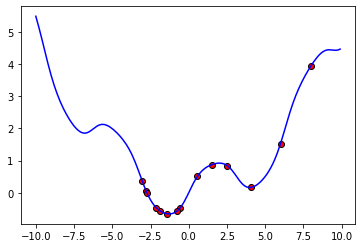

In [19]:
x0 = 8
lr = 2
iterations = 15
points= []

x_range = torch.arange(-10, 10, 0.1)
x = torch.Tensor([x0]).requires_grad_()
optimizer = torch.optim.Adam([x], lr=lr)

for i in range(iterations):
    optimizer.zero_grad()
    f = function_2d(x)
    f.backward()
    points += [(x.item(), f.item())]
    optimizer.step()
    
anim_2d(x_range, function_2d, points, 400)

## 3D Plot - Optimization process

In [0]:
from live_plot import anim_3d

__Choose a function below and run the cell__

In [0]:
elev, azim = 40, 250
x0, y0 = 6, -0.01
x_range = torch.arange(-10, 10, 1).float()
y_range = torch.arange(-15, 10, 2).float()

def function_3d(x, y):
    return x ** 2 - y ** 2

In [0]:
elev, azim = 30, 130
x0, y0 = 10, -4
x_range = torch.arange(-10, 15, 1).float()
y_range = torch.arange(-15, 10, 2).float()

def function_3d(x, y):
    return x ** 3 - y ** 3

In [0]:
elev, azim = 80, 130
x0, y0 = 4, -5
x_range = torch.arange(-10, 10, .5).float()
y_range = torch.arange(-10, 10, 1).float()

def function_3d(x, y):
    return (x ** 2 + y ** 2).sqrt().sin()

In [0]:
elev, azim = 37, 120
x0, y0 = 6, -15
x_range = torch.arange(-10, 12, 1).float()
y_range = torch.arange(-25, 5, 1).float()

# lr 0.15 momentum 0.5
def function_3d(x, y):
    return (x ** 2 / 20 + x.sin().tanh()) * (y.abs()) ** 1.2 + 5 * x.abs() + (y + 7)**2 / 10

__Optimize the function__

In [0]:
lr = .1
iterations = 15

x = torch.Tensor([x0]).requires_grad_()
y = torch.Tensor([y0]).requires_grad_()
optimizer = torch.optim.SGD([x, y], lr=lr)
points = []

for i in range(iterations):
    optimizer.zero_grad()
    f = function_3d(x, y)
    f.backward()
    points += [(x.item(), y.item(), f.item())]
    optimizer.step()
    
anim_3d(x_range, y_range, elev, azim, function_3d, points, 100)

___

<!--NAVIGATION-->
# < [Autograd](2-Autograd.ipynb) | Optimization | [Modules](4-Modules.ipynb) >